In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
Amazon_sale = pd.read_csv('Amazon Sale Report.csv')

C:\Users\siddh\AppData\Local\Temp\ipykernel_18020\3450639715.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  Amazon_sale = pd.read_csv('Amazon Sale Report.csv')


In [4]:
Amazon_sale.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [5]:
Amazon_sale.dropna(inplace  = True)

In [6]:
list = [ 'Date', 'Status',  
        'Category', 'Size', 
       'Courier Status',  'Amount', 'ship-city',
       'ship-state', 'ship-country']

In [7]:
Amazon_sale.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [8]:
df = Amazon_sale[list]

In [9]:
df.reset_index(inplace = True)

In [10]:
df.drop('index',axis = 1, inplace = True)

C:\Users\siddh\AppData\Local\Temp\ipykernel_18020\1821528816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('index',axis = 1, inplace = True)


In [11]:
df['Amount']

0         888.0
1         371.0
2         771.0
3           0.0
4         690.0
          ...  
19374     999.0
19375    1523.0
19376     854.0
19377     518.0
19378     721.0
Name: Amount, Length: 19379, dtype: float64

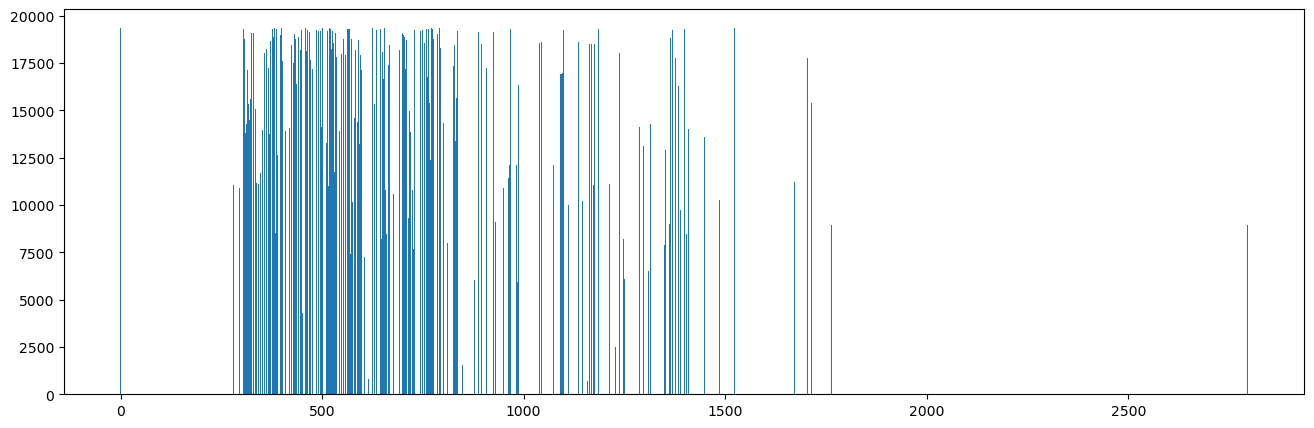

In [12]:
plt.figure(figsize = (16,5))
plt.bar(df['Amount'],df.index)

plt.show()

In [13]:
df.head()

,Date,Status,Category,Size,Courier Status,Amount,ship-city,ship-state,ship-country
0,05-31-22,Shipped - Delivered to Buyer,kurta,M,Shipped,888.0,RAJAHMUNDRY,ANDHRA PRADESH,IN
1,05-31-22,Shipped - Delivered to Buyer,Top,XXL,Shipped,371.0,CHENNAI,TAMIL NADU,IN
2,05-31-22,Shipped - Delivered to Buyer,Western Dress,XS,Shipped,771.0,NEDUMANGAD,KERALA,IN
3,05-31-22,Shipped - Delivered to Buyer,Western Dress,L,Shipped,0.0,LEH,JAMMU & KASHMIR,IN
4,05-31-22,Shipped - Delivered to Buyer,Western Dress,XL,Shipped,690.0,PIMPRI CHINCHWAD,MAHARASHTRA,IN


In [14]:
df['Category'].unique()

array(['kurta', 'Top', 'Western Dress', 'Set', 'Ethnic Dress', 'Bottom',
       'Blouse', 'Saree'], dtype=object)

<Axes: ylabel='Amount'>

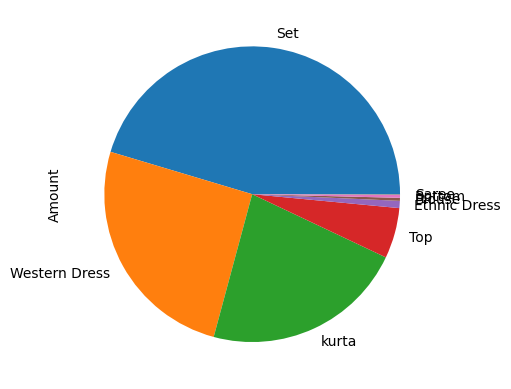

In [41]:
df.groupby('Category')['Amount'].sum().sort_values(ascending=False).plot(kind = 'pie')

In [16]:
main = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)

In [17]:
main

Category
Set              5919897.0
Western Dress    3318232.0
kurta            2891562.0
Top               721354.0
Ethnic Dress      102085.0
Blouse             42488.0
Bottom             41541.0
Saree               9659.0
Name: Amount, dtype: float64

In [18]:
main.values

array([5919897., 3318232., 2891562.,  721354.,  102085.,   42488.,
         41541.,    9659.])

In [19]:
main.indexq

Index(['Set', 'Western Dress', 'kurta', 'Top', 'Ethnic Dress', 'Blouse',
       'Bottom', 'Saree'],
      dtype='object', name='Category')

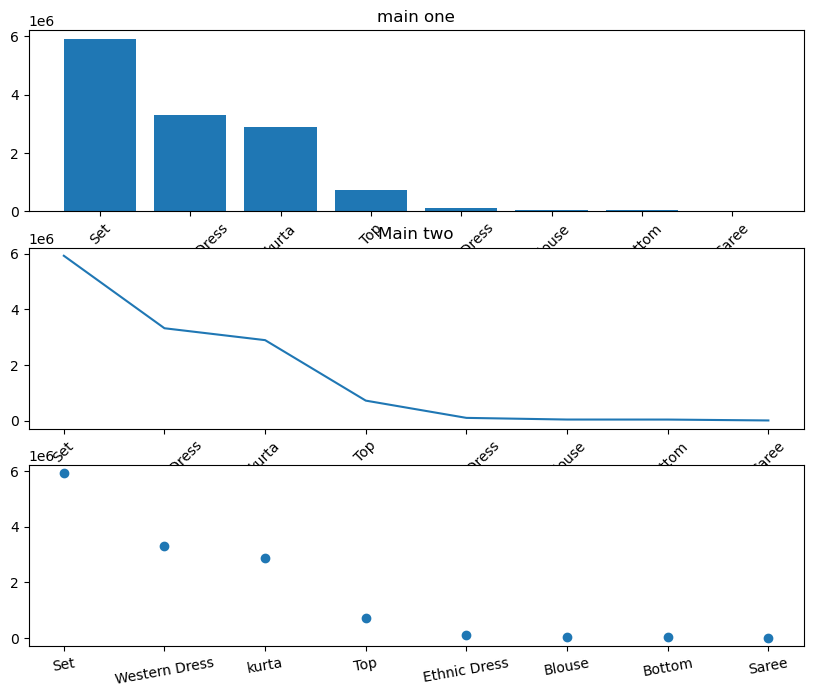

In [89]:
plt.figure(figsize = (10,8))
plt.subplot(3,1,1)
plt.bar(main.index,main.values)
plt.title('main one')
plt.xticks(rotation=45)

plt.subplot(3,1,2)
plt.plot(main.index,main.values)
plt.title('Main two')
plt.xticks(rotation=45)

plt.subplot(3,1,3)
plt.scatter(main.index,main.values)
plt.xticks(rotation=10)
plt.show()


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19379 entries, 0 to 19378
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            19379 non-null  datetime64[ns]
 1   Status          19379 non-null  object        
 2   Category        19379 non-null  object        
 3   Size            19379 non-null  object        
 4   Courier Status  19379 non-null  object        
 5   Amount          19379 non-null  float64       
 6   ship-city       19379 non-null  object        
 7   ship-state      19379 non-null  object        
 8   ship-country    19379 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 1.3+ MB


In [67]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\siddh\AppData\Local\Temp\ipykernel_18020\2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\siddh\AppData\Local\Temp\ipykernel_18020\2394721818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [97]:
Main = df.groupby('Date')['Amount'].sum()

In [99]:
Main

Date
2022-04-30     16615.0
2022-05-01    203966.0
2022-05-02    244839.0
2022-05-03    244499.0
2022-05-04    258427.0
                ...   
2022-06-25    145856.0
2022-06-26    184702.0
2022-06-27    195543.0
2022-06-28    203534.0
2022-06-29    122412.0
Name: Amount, Length: 61, dtype: float64

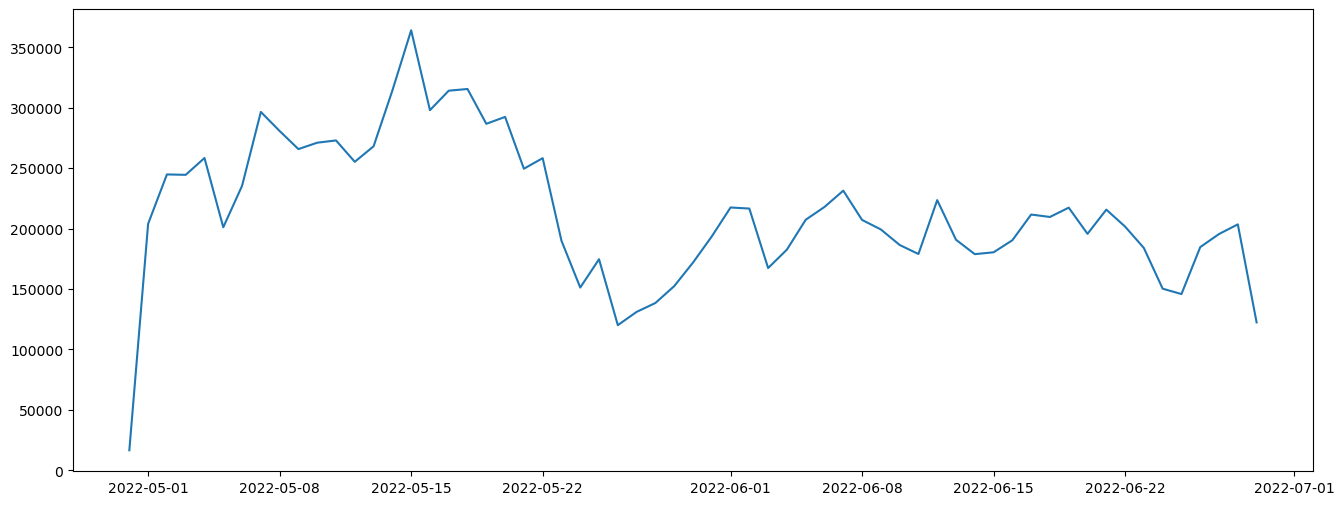

In [107]:
plt.figure(figsize = (16,6))

plt.plot(Main.index,Main.values)

plt.show()

In [109]:
df.head()

,Date,Status,Category,Size,Courier Status,Amount,ship-city,ship-state,ship-country
0,2022-05-31,Shipped - Delivered to Buyer,kurta,M,Shipped,888.0,RAJAHMUNDRY,ANDHRA PRADESH,IN
1,2022-05-31,Shipped - Delivered to Buyer,Top,XXL,Shipped,371.0,CHENNAI,TAMIL NADU,IN
2,2022-05-31,Shipped - Delivered to Buyer,Western Dress,XS,Shipped,771.0,NEDUMANGAD,KERALA,IN
3,2022-05-31,Shipped - Delivered to Buyer,Western Dress,L,Shipped,0.0,LEH,JAMMU & KASHMIR,IN
4,2022-05-31,Shipped - Delivered to Buyer,Western Dress,XL,Shipped,690.0,PIMPRI CHINCHWAD,MAHARASHTRA,IN


In [121]:
main2 = df['ship-city'].value_counts().head(10)

In [139]:
main3 = df.groupby('ship-city')['Amount'].sum().sort_values().tail(10)

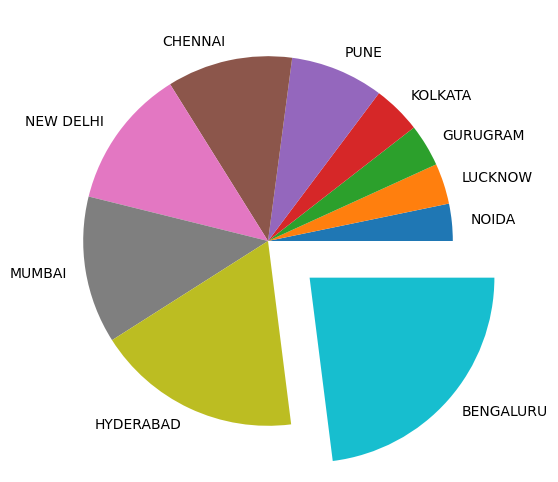

In [175]:
plt.figure(figsize = (16,6))
plt.pie(main3.values,labels = list,explode = list1)
plt.show()

In [167]:
main3.shape

(10,)

In [173]:
list1 =[0,0,0,0,0,0,0,0,0,0.3]

In [157]:
list

Index(['NOIDA', 'LUCKNOW', 'GURUGRAM', 'KOLKATA', 'PUNE', 'CHENNAI',
       'NEW DELHI', 'MUMBAI', 'HYDERABAD', 'BENGALURU'],
      dtype='object', name='ship-city')

In [179]:
df.head()

,Date,Status,Category,Size,Courier Status,Amount,ship-city,ship-state,ship-country
0,2022-05-31,Shipped - Delivered to Buyer,kurta,M,Shipped,888.0,RAJAHMUNDRY,ANDHRA PRADESH,IN
1,2022-05-31,Shipped - Delivered to Buyer,Top,XXL,Shipped,371.0,CHENNAI,TAMIL NADU,IN
2,2022-05-31,Shipped - Delivered to Buyer,Western Dress,XS,Shipped,771.0,NEDUMANGAD,KERALA,IN
3,2022-05-31,Shipped - Delivered to Buyer,Western Dress,L,Shipped,0.0,LEH,JAMMU & KASHMIR,IN
4,2022-05-31,Shipped - Delivered to Buyer,Western Dress,XL,Shipped,690.0,PIMPRI CHINCHWAD,MAHARASHTRA,IN


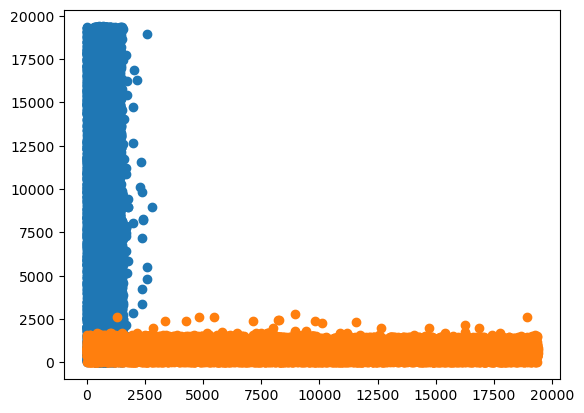

In [201]:
plt.scatter(df['Amount'],df.index)
plt.scatter(df.index,df['Amount'],)

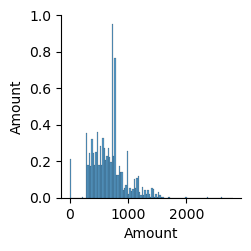

In [181]:
sns.pairplot(df)

In [190]:
newdf = pd.read_csv('May-2022.csv')

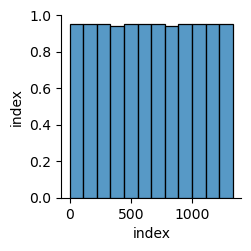

In [188]:
sns.pairplot(newdf)

In [194]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           1330 non-null   int64 
 1   Sku             1330 non-null   object
 2   Style Id        1330 non-null   object
 3   Catalog         1330 non-null   object
 4   Category        1330 non-null   object
 5   Weight          1330 non-null   object
 6   TP              1330 non-null   object
 7   MRP Old         1330 non-null   object
 8   Final MRP Old   1330 non-null   object
 9   Ajio MRP        1330 non-null   object
 10  Amazon MRP      1330 non-null   object
 11  Amazon FBA MRP  1330 non-null   object
 12  Flipkart MRP    1330 non-null   object
 13  Limeroad MRP    1330 non-null   object
 14  Myntra MRP      1330 non-null   object
 15  Paytm MRP       1330 non-null   object
 16  Snapdeal MRP    1330 non-null   object
dtypes: int64(1), object(16)
memory usage: 176.8+ KB
